In [1]:
import pandas as pd
import numpy as np
import re

In [40]:
path = r'C:\Users\sormd\Desktop\수업_1학기\텍스트마이닝\프로젝트'
df = pd.read_csv(path + r'\skt_nugu.csv',index_col=0)
df.head()

,title,publish_datetime,text,url
0,인공지능스피커 SKT 누구 미니 (NUGU mini) 연결 방법,2018-07-17 17:00:00,저희 집에는 인공지능스피커인 카카오 미니와 클로버가 있어요.그리고 얼마 전 SKT ...,['https://blog.naver.com/sanghyo1026?Redirect=...
1,SKT NUGU 인공지능 스피커 누구캔들 3달째 사용중!,2018-09-14 19:32:00,세달 전에 우리집에 온 인공지능 스피커 누구캔들!밤마다 잠자리를 은은하게 밝혀주며힐...,['https://blog.naver.com/reeyoung82?Redirect=L...
2,"최근 지름샷 (feat. 두피마사지기, SKT 누구 미니 등)",2018-11-22 07:40:00,지난달 말부터 블랙프라이데이라고 여기저기서 난리더니 여전히 다양한 쇼핑 이벤트가 매...,['https://blog.naver.com/kecodak?Redirect=Log&...
3,인공지능 스피커 SKT 누구 미니 - sk nugu mini 사용 후기,2018-07-03 07:00:00,"\n인공지능(AI), IOT가 많은 전자제품들에 적용되어 출시되고 있어요~보일러에서...",['https://blog.naver.com/eunj_79?Redirect=Log&...
4,SKT 누구 캔들 아이와 함께한 한달 사용기,2018-12-02 22:50:00,매일 아침 날씨도 알려주고미세먼지도 말해주는 친절한 누구캔들벌써 한달째 사용하고 있...,['https://blog.naver.com/dgd1005?Redirect=Log&...


# 토큰화

In [7]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

C:\Users\sormd\Anaconda3\lib\site-packages\soynlp\tokenizer\_tokenizer.py:19: FutureWarning: Possible nested set at position 13
  ('english & latin', re.compile(u"[a-zA-ZÀ-ÿ]+[[`']?s]*|[a-zA-ZÀ-ÿ]+", re.UNICODE))


In [8]:
# 샘플로 보고 싶은 인덱스의 번호를 넣어주세요.
sample_index = 24

In [10]:
sample_title = df.loc[sample_index, 'title']
sample_title

'인공지능스피커 SKT 누구캔들, 노래 선곡 잘하는데?'

In [11]:
sample_content = df['text'][sample_index]
sample_content

"인공지능 스피커와 실내등이 결합한\xa0SK텔레콤 누구캔들을 지난번 소개해드렸었는데요~ 알람이나 날씨, 무드등 기능 덕분에 너무 좋다고ㅎㅎ 게다가 핸드폰 찾기 기능까지 유용하게 사용중이예요~ 여전히 핸드폰이 어디로 사라져있는지 모를때가 많은데 이젠 헤매지 않고 아리아만 부르면 되요ㅎㅎ \n요즘 광고도 많이 보여서 더 반갑더라구요ㅋㅋㅋ 맨날 아리아랑 대화도 하고~ 이것저것 물어보기도 하고ㅋㅋㅋ 워낙 똑똑하니깐~~ㅋㅋ 누구캔들을 통해서 사용할 수 있는 정말 많은 기능이 있는데 그 중에서 제가 요즘 제일 많이 사용하는~ 기능을 보여드릴께요! \n아리아~ TV 켜줘 (Btv 연동) 첫번째는 바로 Btv 연동 기능이예요 요것은~ 마침 우리 집이 Btv를 사용하고 있던 터라ㅎㅎㅎ 앗싸 하면서 바로 연결을 시켜봤어요ㅋㅋ \n사용 전에 누구 앱에서\xa0간단하게 연결만 해주면 되요 한번만 해놓으면 쭉 되는거라서 편해용 누구캔들은 누구 앱을 꼭 깔고 사용해줘야 하는데요~ 누구 앱에 들어가면 Btv 연동 카테고리가 있어요 요기를 들어가서 인증만 한번 해주면 되요! 인증번호는 TV를 켜고\xa0설정 > 기기연결 설정 > NUGU 연결 들어가면 있어요 연동하는데 뭐 거의 5분도 안걸린듯 해요 \n연동된 즉시 바로 누구캔들을 통해 TV를 마음껏 조절(?)할 수 있답니당 크크 끄고 켜는거나 채널 돌리는거, 볼륨,\xa0방송찾기\xa0등등 음성명령으로 다 가능해요 다만 사용해보면서 개인적으로 느낀건~ 일단 누구캔들이 TV 스피커 바로 옆에 위치하지 않는게 좋아요! TV가 꺼져있을땐 괜찮은데 TV 소리때문에 아리아가 내 목소리를 잘 못듣더라구요 그래서 쇼파 옆이나 탁자 있는데 두고 사용하는게 훨씬 편해용 그리구 채널 그냥 위아래 이동이나 볼륨 같은건 리모콘으로 하고 진짜 누구캔들이 필요한 순간 이용하면 정말 아 이게 바로 음성의 매력이구나 느낄 수 있어요 모든 걸 다 음성으로만 하려고 하면 뭐야 이거 더 불편해 할 수도 있음 잘 활용하는 요령이 필요하다는걸 깨달았죵ㅋㅋㅋ \n누구캔들이 

In [12]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['인공지능스피커', 'SKT', '누구캔들', ',', '노래', '선곡', '잘하는데', '?']

In [13]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:20]

['인공지능',
 '스피커와',
 '실내등이',
 '결합한',
 'SK',
 '텔레콤',
 '누구캔들을',
 '지난번',
 '소개해드렸었는데요',
 '~',
 '알람이나',
 '날씨',
 ',',
 '무드등',
 '기능',
 '덕분에',
 '너무',
 '좋다고',
 'ㅎㅎ',
 '게다가']

In [14]:
print(len(tokened_title))
print(len(tokened_content))

8
742


# 전처리

In [50]:
df['text'][df['text'].isna()]
df['text'].isna().sum()

2

In [49]:
df.isna().sum()

title               2
publish_datetime    2
text                2
url                 0
dtype: int64

In [54]:
df_dropna = df.dropna()

In [55]:
len(df_dropna)

88

In [59]:
df_dropna['text'].isna().sum()

0

In [36]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    return text

In [60]:
sentences = df_dropna['text'].apply(preprocessing)

In [61]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

Wall time: 443 ms


0    [저희, 집에는, 인공지능스피커인, 카카오, 미니와, 클로버가, 있어요, ., 그리...
1    [세달, 전에, 우리집에, 온, 인공지능, 스피커, 누구캔들, !, 밤마다, 잠자리...
2    [지난달, 말부터, 블랙프라이데이라고, 여기저기서, 난리더니, 여전히, 다양한, 쇼...
Name: text, dtype: object

In [62]:
tokens[sample_index][:10]

['인공지능', '스피커와', '실내등이', '결합한', 'SK', '텔레콤', '누구캔들을', '지난번', '소개해드렸었는데요', '~']

In [24]:
df['text']

0    저희 집에는 인공지능스피커인 카카오 미니와 클로버가 있어요.그리고 얼마 전 SKT ...
1    세달 전에 우리집에 온 인공지능 스피커 누구캔들!밤마다 잠자리를 은은하게 밝혀주며힐...
2    지난달 말부터 블랙프라이데이라고 여기저기서 난리더니 여전히 다양한 쇼핑 이벤트가 매...
3    \n인공지능(AI), IOT가 많은 전자제품들에 적용되어 출시되고 있어요~보일러에서...
4    매일 아침 날씨도 알려주고미세먼지도 말해주는 친절한 누구캔들벌써 한달째 사용하고 있...
Name: text, dtype: object

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [118]:
path = r'C:\Users\sormd\PycharmProjects\testproject\pyTextMiner'
stopwords = open(path + r'\stopwordsKor.txt', 'r', encoding='UTF8')
lines = stopwords.read().splitlines()
print(lines)
f.close()

['\ufeff', '있습니다', '있어', '있는', '있다', '있죠', '있어요', '있으며', '있어서', '있는데요', '있답니다', '해서', '하는', '하고', '하면', '합니다', '되어', '됩니다', '같은', '이렇게', '바로', '물론', '가장', '정말', '너무', '제가', '', '청원', '모식도', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '내', '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들', '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '동안', '을', '다음', '연도', '이상', '위', '아래', '간', '대', '각종', '후', '반면', '대부분', '회', '년대', '조', '포함', '차', '산하', '바', '이내', '뿐', '급', '별지', '량', '초기', '미만', '관련', '형', '위주', '외', '한편', '최대한', '그동안', '호', '이후', '과', '당초', '아래', '실', '앞으로', '본래', '이전', '형', '양', '항', '타', 

In [104]:
from matplotlib import font_manager, rc
path = 'c:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [119]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath, 
                        stopwords = lines, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

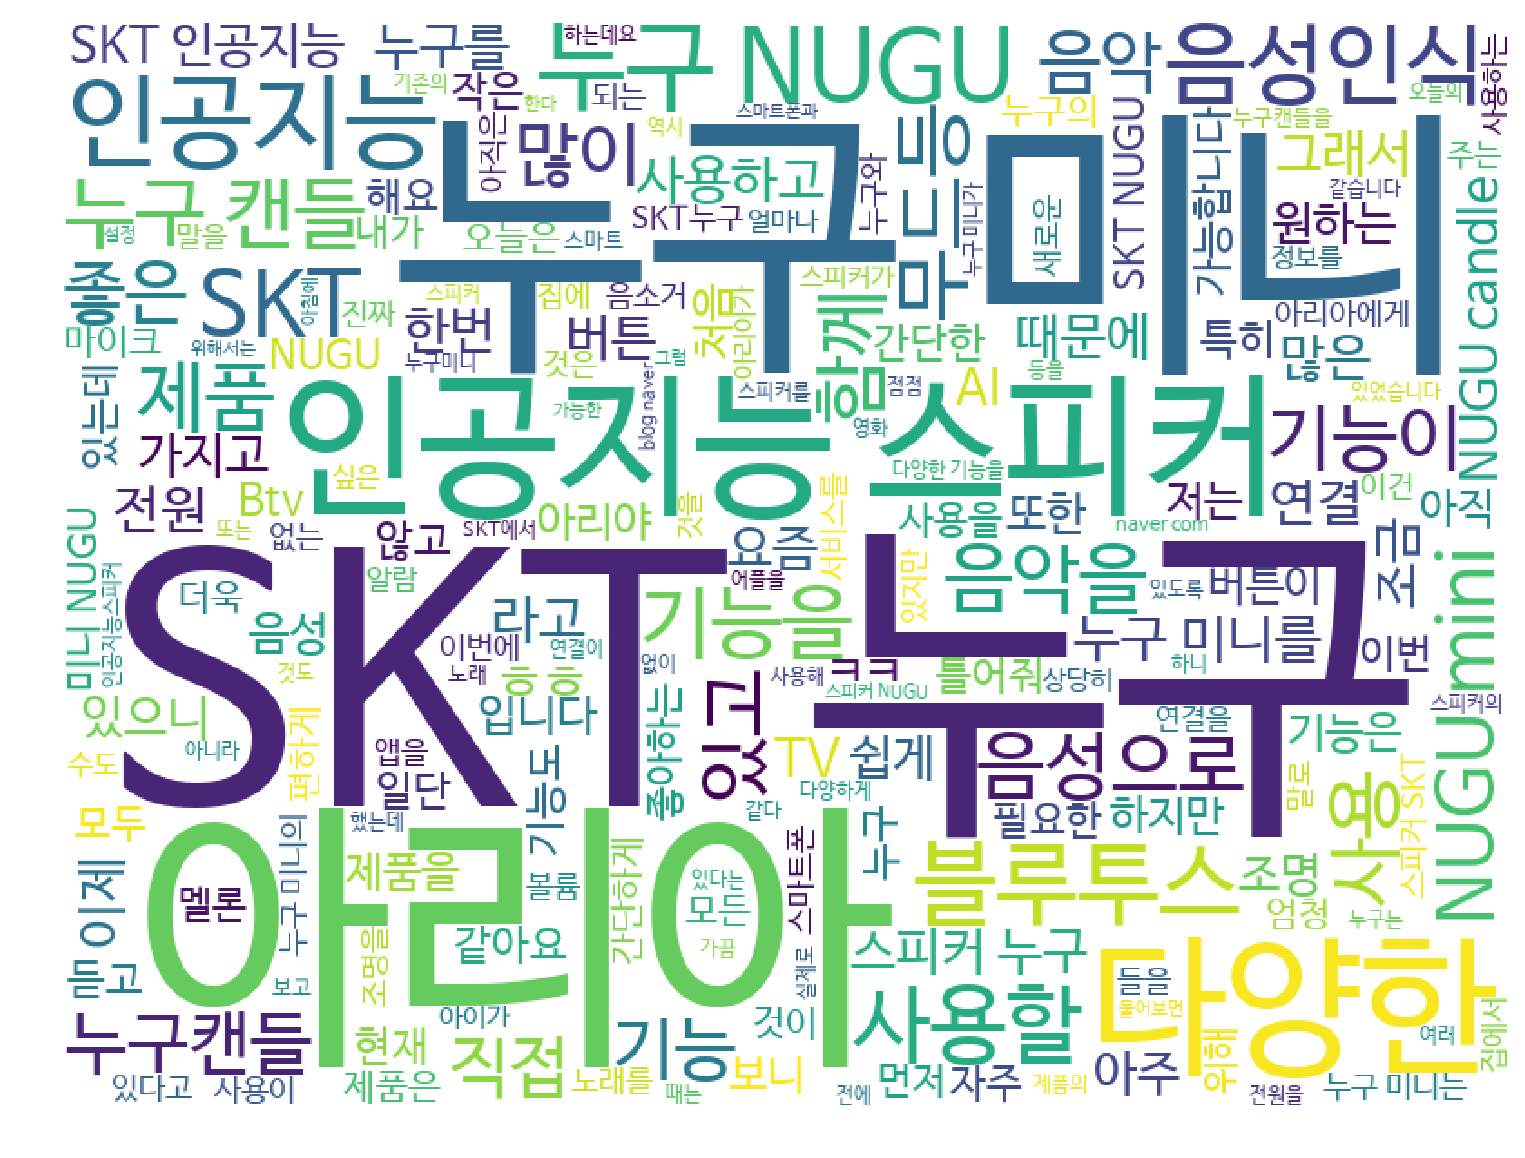

Wall time: 6.01 s


In [120]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(sentences))

In [121]:
from soynlp.noun import LRNounExtractor

In [122]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (2728, 1601) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 528 nouns are extracted
Wall time: 884 ms


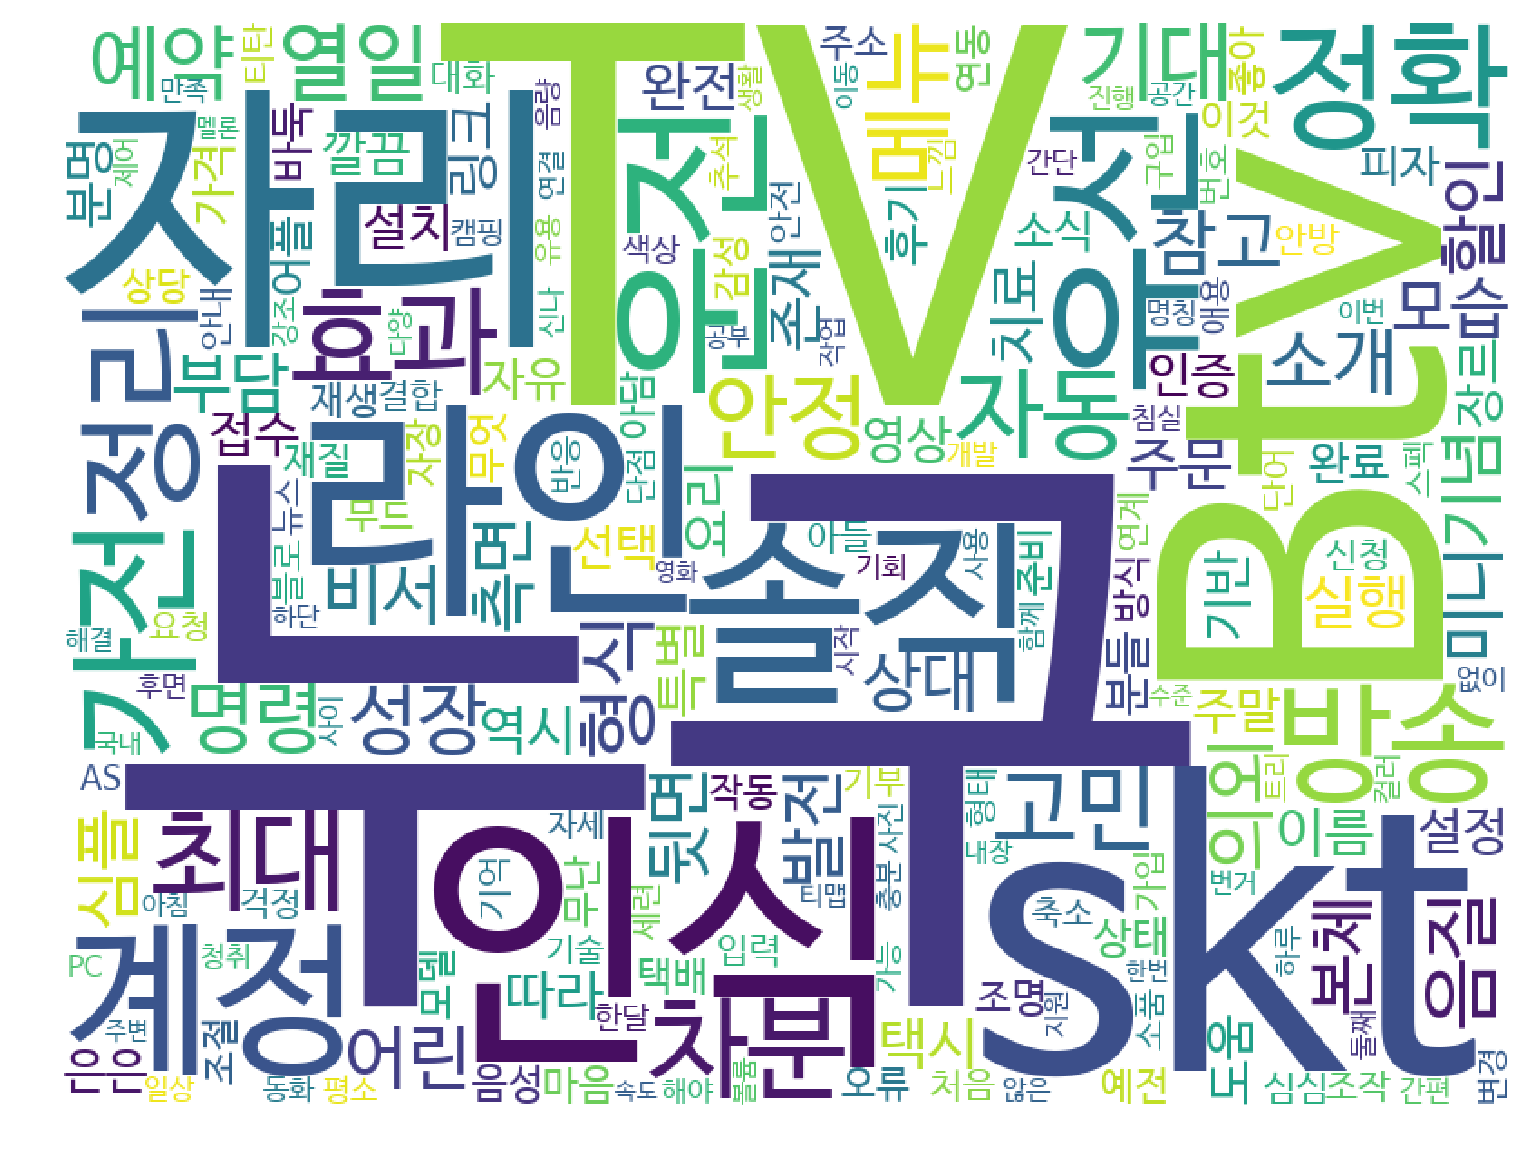

Wall time: 6.09 s


In [123]:
# 추출된 명사를 찍어봅니다.
%time displayWordCloud(' '.join(nouns))